# Import the libraries

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make a sample classification dataset

In [2]:
import sklearn
from sklearn.datasets import make_circles

In [3]:
# Make 1000 samples

n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [6]:
y[:5]

array([1, 1, 1, 1, 0])

#### make datafarme of these data

In [7]:
df = pd.DataFrame({"X1":X[:, 0], "X2":X[:, 1], "Label":y})
df[:10]

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


#### Visualize the data

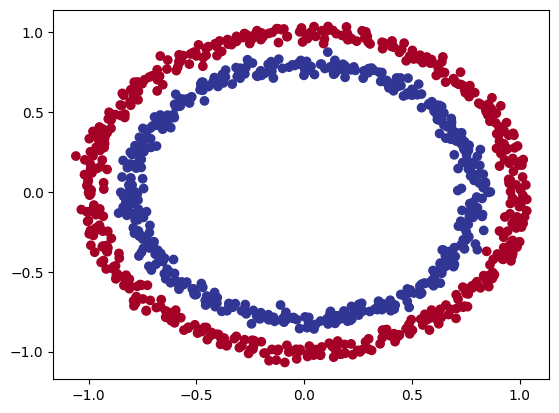

In [8]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shape of one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape of one sample of X: (2,) and the same for y: ()


# Turn data into tensors

In [11]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [13]:
X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [14]:
y[:5]

tensor([1., 1., 1., 1., 0.])

# Split data into training and testing

In [15]:
torch.manual_seed(42)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Create the model

#### Create the device agnostic code

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

#### Send the data to the target device

In [19]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

#### Subclass the nn.Module and create a model

In [20]:
class CricleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer1 = nn.Linear(in_features=2, out_features=5)
    self.linear_layer2 = nn.Linear(in_features=5, out_features=1)


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    z = self.linear_layer1(x)
    z = self.linear_layer2(z)
    return z

subclass_model_0 = CricleModelV1().to(device)
subclass_model_0

CricleModelV1(
  (linear_layer1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
subclass_model_0.state_dict()

OrderedDict([('linear_layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('linear_layer1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('linear_layer2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('linear_layer2.bias', tensor([-0.2060], device='cuda:0'))])

In [22]:
next(subclass_model_0.parameters()).device

device(type='cuda', index=0)

#### Create the same model using nn.Sequential()

In [23]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [24]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

#### Make some predictions using the model (without training)

In [26]:
model_0.eval()
with torch.inference_mode():
  untrained_y_pred = model_0(X_test)

In [27]:
print(f'Length of untrained preds: {len(untrained_y_pred)} and the shape: {untrained_y_pred.shape}')
print(f'Length of test samples: {len(X_test)} and the shape: {X_test.shape}')
print(f'\nFirst 10 predictions:\n {untrained_y_pred[:10]}')
print(f'\nFirst 10 labels:\n {y_test[:10]}')

Length of untrained preds: 200 and the shape: torch.Size([200, 1])
Length of test samples: 200 and the shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


#### Setup a loss function and a optimizer

In [28]:
# Loss function
loss_fn = nn.BCEWithLogitsLoss()

# optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

#### Evaluation metricess

##### Accuracy

In [29]:
def accuracy_fn(y_true, y_preds):
  correct = torch.eq(y_true, y_preds).sum().item()
  acc = (correct/len(y_preds)) * 100
  return acc

#### Going from raw logits --> Prediction probabilities --> Prediction labels

In [30]:
# Raw logits
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test)[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [31]:
# Prediction probabilities after going through a activation function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [32]:
# Find the prediction labels
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [33]:
# In full (all the steps togather)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)[:5]))
y_pred_labels

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [34]:
y_logits_unsq = model_0(X_train)
y_logits_unsq[:5]


tensor([[ 0.2826],
        [ 0.3236],
        [ 0.0202],
        [ 0.0421],
        [-0.0271]], device='cuda:0', grad_fn=<SliceBackward0>)

In [35]:
y_logits_sq = model_0(X_train).squeeze()
y_logits_sq[:5]

tensor([ 0.2826,  0.3236,  0.0202,  0.0421, -0.0271], device='cuda:0',
       grad_fn=<SliceBackward0>)

#### Trining loop

In [36]:
# Set the manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create list to store data
accuracy_count = []
epoch_count = []
loss_count = []
test_loss_count = []
test_acc_count = []

# number of epochs
epochs = 100

for epoch in range(epochs):
  # put the model to trainin mode
  model_0.train()
  epoch_count.append(epoch)

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss
  loss = loss_fn(y_logits, y_train)
  accuracy = accuracy_fn(y_true=y_train,
                         y_preds=y_pred)

  loss_count.append(loss.item())
  accuracy_count.append(accuracy)

  # optimizer zero grad
  optimizer.zero_grad()
  #  Backprop
  loss.backward()
  # Gradient descent
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate test loss
    test_loss = loss_fn(test_logits,
                        y_test)

    test_loss_count.append(test_loss.item())

    test_acc = accuracy_fn(y_true=y_test,
                           y_preds=test_pred)

    test_acc_count.append(test_acc)

    # print out whats happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train accuracy:{accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")

Epoch: 0 | Train Loss: 0.69796 | Train accuracy:51.88% | Test Loss: 0.69440 | Test accuracy: 58.00
Epoch: 10 | Train Loss: 0.69590 | Train accuracy:51.25% | Test Loss: 0.69305 | Test accuracy: 53.00
Epoch: 20 | Train Loss: 0.69490 | Train accuracy:51.62% | Test Loss: 0.69254 | Test accuracy: 49.50
Epoch: 30 | Train Loss: 0.69435 | Train accuracy:51.12% | Test Loss: 0.69236 | Test accuracy: 49.50
Epoch: 40 | Train Loss: 0.69401 | Train accuracy:50.88% | Test Loss: 0.69232 | Test accuracy: 51.00
Epoch: 50 | Train Loss: 0.69378 | Train accuracy:50.25% | Test Loss: 0.69234 | Test accuracy: 50.00
Epoch: 60 | Train Loss: 0.69362 | Train accuracy:50.00% | Test Loss: 0.69239 | Test accuracy: 51.50
Epoch: 70 | Train Loss: 0.69351 | Train accuracy:50.25% | Test Loss: 0.69246 | Test accuracy: 51.00
Epoch: 80 | Train Loss: 0.69342 | Train accuracy:49.88% | Test Loss: 0.69254 | Test accuracy: 50.00
Epoch: 90 | Train Loss: 0.69336 | Train accuracy:49.88% | Test Loss: 0.69262 | Test accuracy: 53.00


#### Make some predictions using the model

In [37]:
import requests
from pathlib import Path

# Download the helper function
if Path("helper_function.py").is_file():
  print(f'Already exisit, skipping download')
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary

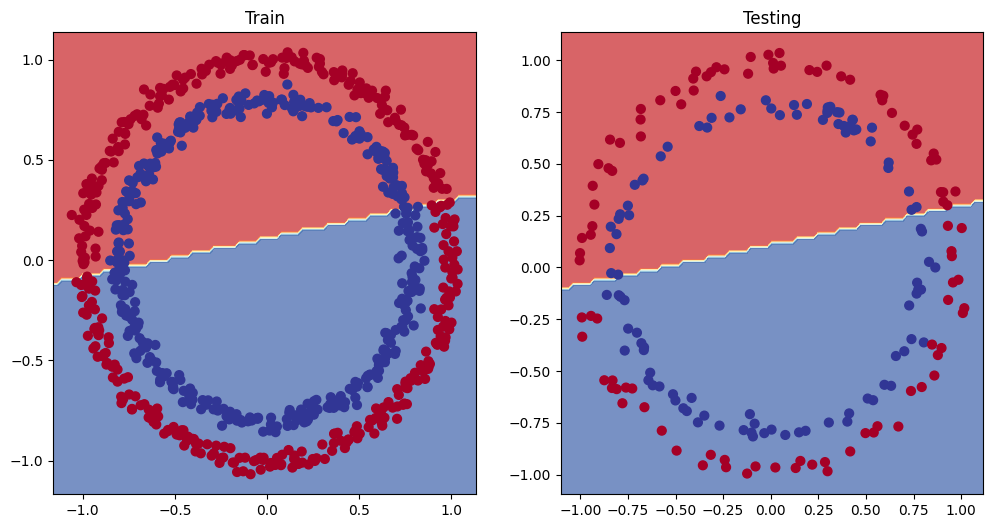

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_0, X_test, y_test)


# Change the hyper parameteds and create the model again

In [39]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z

model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

#### Create a loss function and a optimizer

In [41]:
# Loss function
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

#### Training loop

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# trainin epochs
epochs = 1000

for epoch in range(epochs):
  # put the model in training mode
  model_1.train()

  # Forward pass
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))


  # Loss / accuracy
  train_loss = loss_fn(y_logits, y_train)
  train_acc = accuracy_fn(y_true=y_train,
                          y_preds = y_preds)

  # zero grad
  optimizer.zero_grad()

  # backprop
  train_loss.backward()

  # Gradient descent
  optimizer.step()


  # Testing
  model_1.eval()
  with torch.inference_mode():

    # Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_preds = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train accuracy:{train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")

Epoch: 0 | Train Loss: 0.69396 | Train accuracy:50.88% | Test Loss: 0.69261 | Test accuracy: 51.00
Epoch: 100 | Train Loss: 0.69369 | Train accuracy:50.25% | Test Loss: 0.69269 | Test accuracy: 50.00
Epoch: 200 | Train Loss: 0.69351 | Train accuracy:50.12% | Test Loss: 0.69282 | Test accuracy: 49.50
Epoch: 300 | Train Loss: 0.69339 | Train accuracy:50.50% | Test Loss: 0.69295 | Test accuracy: 49.00
Epoch: 400 | Train Loss: 0.69329 | Train accuracy:50.38% | Test Loss: 0.69309 | Test accuracy: 48.50
Epoch: 500 | Train Loss: 0.69322 | Train accuracy:49.88% | Test Loss: 0.69322 | Test accuracy: 49.50
Epoch: 600 | Train Loss: 0.69317 | Train accuracy:49.50% | Test Loss: 0.69335 | Test accuracy: 53.00
Epoch: 700 | Train Loss: 0.69313 | Train accuracy:49.38% | Test Loss: 0.69347 | Test accuracy: 50.50
Epoch: 800 | Train Loss: 0.69309 | Train accuracy:50.00% | Test Loss: 0.69358 | Test accuracy: 51.00
Epoch: 900 | Train Loss: 0.69307 | Train accuracy:50.62% | Test Loss: 0.69368 | Test accuracy

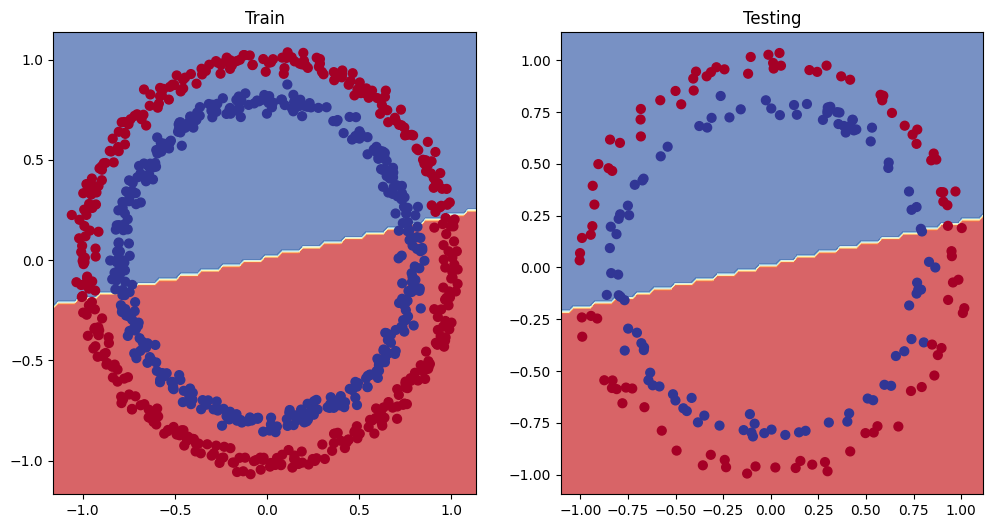

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_1, X_test, y_test)


# Building a model with non linearity

In [44]:
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=128)
    self.relu_1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=128, out_features=128)
    self.relu_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=128, out_features=1)

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    z = self.layer_1(x)
    z = self.relu_1(z)
    z = self.layer_2(z)
    z = self.relu_2(z)
    z = self.layer_3(z)
    return z


model_3 = CircleModelV3().to(device)
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (relu_1): ReLU()
  (layer_2): Linear(in_features=128, out_features=128, bias=True)
  (relu_2): ReLU()
  (layer_3): Linear(in_features=128, out_features=1, bias=True)
)

In [45]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230],
                      [ 0.1900, -0.1918],
                      [ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
  

#### Create the loss function and the optimizer

In [46]:
# loss function
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)

#### Craete the training loop

In [47]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# number of epochs
epochs = 10000

for epoch in range(epochs):

  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  train_loss = loss_fn(y_logits, y_train)
  train_acc = accuracy_fn(y_train, y_preds)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():

    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train accuracy:{train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")

Epoch: 0 | Train Loss: 0.69356 | Train accuracy:50.00% | Test Loss: 0.69461 | Test accuracy: 50.00
Epoch: 1000 | Train Loss: 0.66876 | Train accuracy:79.38% | Test Loss: 0.67421 | Test accuracy: 79.00
Epoch: 2000 | Train Loss: 0.61425 | Train accuracy:97.12% | Test Loss: 0.62893 | Test accuracy: 92.00
Epoch: 3000 | Train Loss: 0.48043 | Train accuracy:99.00% | Test Loss: 0.51386 | Test accuracy: 98.00
Epoch: 4000 | Train Loss: 0.28026 | Train accuracy:99.62% | Test Loss: 0.32891 | Test accuracy: 99.00
Epoch: 5000 | Train Loss: 0.14201 | Train accuracy:100.00% | Test Loss: 0.18651 | Test accuracy: 100.00
Epoch: 6000 | Train Loss: 0.08064 | Train accuracy:100.00% | Test Loss: 0.11657 | Test accuracy: 100.00
Epoch: 7000 | Train Loss: 0.05249 | Train accuracy:100.00% | Test Loss: 0.08212 | Test accuracy: 100.00
Epoch: 8000 | Train Loss: 0.03759 | Train accuracy:100.00% | Test Loss: 0.06296 | Test accuracy: 100.00
Epoch: 9000 | Train Loss: 0.02873 | Train accuracy:100.00% | Test Loss: 0.051

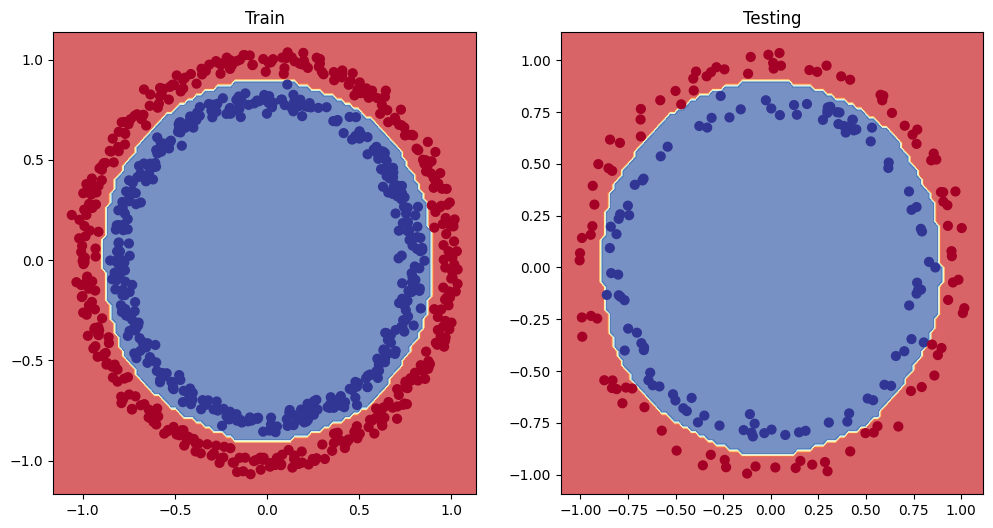

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_3, X_test, y_test)


# Multi class classification

#### Import the libraries

In [49]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
print(torch.__version__)

2.2.1+cu121


#### Create the data

In [103]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
NUM_SAMPLES = 1000

# Create the data

X_blob, y_blob = make_blobs(n_samples = NUM_SAMPLES,
                            n_features = NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)


#### Turn data into tenosrs

In [104]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#### Split the data

In [105]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

#### Visualize the data

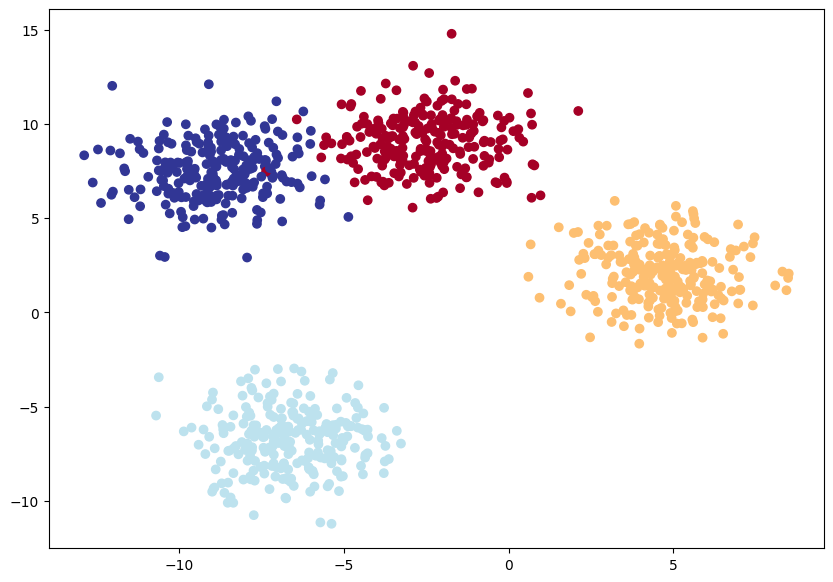

In [106]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

#### Create device agnostic code

In [107]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#### Send the data to the target device

In [108]:
X_blob_train = X_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_train = y_blob_train.to(device)
y_blob_test = y_blob_test.to(device)

#### Create the model

In [109]:
class MakeBlobModelV1(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    self.linear_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )


  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.linear_stack(x)


# Create an instance of the model
model_mc = MakeBlobModelV1(input_features=2,
                           output_features=4,
                           hidden_units=8).to(device)

In [110]:
model_mc.state_dict()

OrderedDict([('linear_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]], device='cuda:0')),
             ('linear_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
                     device='cuda:0')),
             ('linear_stack.1.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
          

In [111]:
next(model_mc.parameters()).device

device(type='cuda', index=0)

#### Create a loss function and a training loop

In [112]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_mc.parameters(), lr=0.01)

In [113]:
model_mc.eval()
with torch.inference_mode():
  y_logits_u= model_mc(X_blob_train)
y_logits_u[:10]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804],
        [-0.5073, -1.2865, -0.7239,  0.3814],
        [ 0.6031, -1.6200,  0.4522,  1.5135],
        [-0.9233, -0.5593, -1.0775, -0.4963],
        [ 1.7228, -1.0307,  1.7717,  1.9579],
        [ 0.5619, -1.4183,  0.4359,  1.3289]], device='cuda:0')

In [114]:
# convert logits to pred probs
pred_probs_u = torch.softmax(y_logits_u, dim=1)
pred_probs_u[:10]

tensor([[0.1838, 0.3422, 0.1500, 0.3239],
        [0.2199, 0.0377, 0.1839, 0.5586],
        [0.3406, 0.0482, 0.5326, 0.0785],
        [0.3405, 0.0657, 0.4446, 0.1492],
        [0.2527, 0.0424, 0.2283, 0.4766],
        [0.2129, 0.0977, 0.1715, 0.5179],
        [0.2245, 0.0243, 0.1931, 0.5581],
        [0.2071, 0.2980, 0.1775, 0.3174],
        [0.2960, 0.0189, 0.3108, 0.3744],
        [0.2396, 0.0331, 0.2113, 0.5160]], device='cuda:0')

In [115]:
torch.sum(pred_probs_u[0])

tensor(1., device='cuda:0')

In [116]:
pred_label_u = torch.argmax(pred_probs_u, dim=1)
pred_label_u[:10]

tensor([1, 3, 2, 2, 3, 3, 3, 3, 3, 3], device='cuda:0')

In [117]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

#### Create the training loop

In [118]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Set number of epochs
epochs = 100

# loop
for epoch in range(epochs):
  # send model to training mode
  model_mc.train()

  # Forward pass
  y_logits = model_mc(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # calcualte loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_blob_train,
                    y_pred)

  # Zero grad
  optimizer.zero_grad()

  # backprop
  loss.backward()

  # gradient descent
  optimizer.step()

  # testing
  model_mc.eval()
  with torch.inference_mode():

    # forward pass
    y_test_logits = model_mc(X_blob_test)
    y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

    # loss/acc
    test_loss = loss_fn(y_test_logits, y_blob_test)
    test_acc = accuracy_fn(y_blob_test,
                           y_test_pred)

  # Whats happening
  if epoch % 2 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")

Epoch: 0 | Train Loss: 1.04324 | Train acc: 65.50% | Test Loss: 0.96335 | Test acc: 71.00
Epoch: 2 | Train Loss: 0.91820 | Train acc: 70.12% | Test Loss: 0.85788 | Test acc: 73.50
Epoch: 4 | Train Loss: 0.82329 | Train acc: 71.88% | Test Loss: 0.77645 | Test acc: 74.00
Epoch: 6 | Train Loss: 0.74846 | Train acc: 73.12% | Test Loss: 0.71127 | Test acc: 74.00
Epoch: 8 | Train Loss: 0.68760 | Train acc: 73.50% | Test Loss: 0.65755 | Test acc: 75.00
Epoch: 10 | Train Loss: 0.63688 | Train acc: 79.50% | Test Loss: 0.61222 | Test acc: 88.00
Epoch: 12 | Train Loss: 0.59376 | Train acc: 88.75% | Test Loss: 0.57325 | Test acc: 94.50
Epoch: 14 | Train Loss: 0.55651 | Train acc: 94.12% | Test Loss: 0.53928 | Test acc: 96.50
Epoch: 16 | Train Loss: 0.52393 | Train acc: 96.25% | Test Loss: 0.50930 | Test acc: 97.50
Epoch: 18 | Train Loss: 0.49513 | Train acc: 96.88% | Test Loss: 0.48261 | Test acc: 98.00
Epoch: 20 | Train Loss: 0.46945 | Train acc: 97.75% | Test Loss: 0.45865 | Test acc: 98.00
Epoc

#### making predictions and evaluatin the data

In [119]:
model_mc.eval()
with torch.inference_mode():
  y_logits = model_mc(X_blob_test)

y_logits[:10]

tensor([[ 0.6728,  2.8048, -5.8948, -3.6846],
        [ 3.1247, -4.3091,  1.2266,  4.8820],
        [-0.3193, -3.6616,  8.5252,  4.9316],
        [ 0.1084,  2.1751, -3.3363, -2.7251],
        [ 2.6332,  0.2090, -5.9259, -0.8331],
        [ 3.6064, -5.2834,  1.8419,  6.0177],
        [-0.7624, -2.6307,  7.7098,  3.7128],
        [ 2.6994, -0.9662, -3.9135,  0.6692],
        [ 0.2015, -5.3148, 10.3011,  6.9350],
        [ 2.6329, -0.5243, -4.5675,  0.1151]], device='cuda:0')

In [120]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.0586e-01, 8.9263e-01, 1.4875e-04, 1.3563e-03],
        [1.4394e-01, 8.5058e-05, 2.1569e-02, 8.3441e-01],
        [1.4030e-04, 4.9603e-06, 9.7309e-01, 2.6761e-02],
        [1.1124e-01, 8.7866e-01, 3.5504e-03, 6.5423e-03],
        [8.9288e-01, 7.9059e-02, 1.7125e-04, 2.7885e-02],
        [8.1168e-02, 1.1184e-05, 1.3902e-02, 9.0492e-01],
        [2.0539e-04, 3.1708e-05, 9.8173e-01, 1.8035e-02],
        [8.6338e-01, 2.2093e-02, 1.1594e-03, 1.1337e-01],
        [3.9722e-05, 1.5973e-07, 9.6659e-01, 3.3371e-02],
        [8.8974e-01, 3.7851e-02, 6.6399e-04, 7.1742e-02]], device='cuda:0')

In [121]:
# pred probs to ped labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

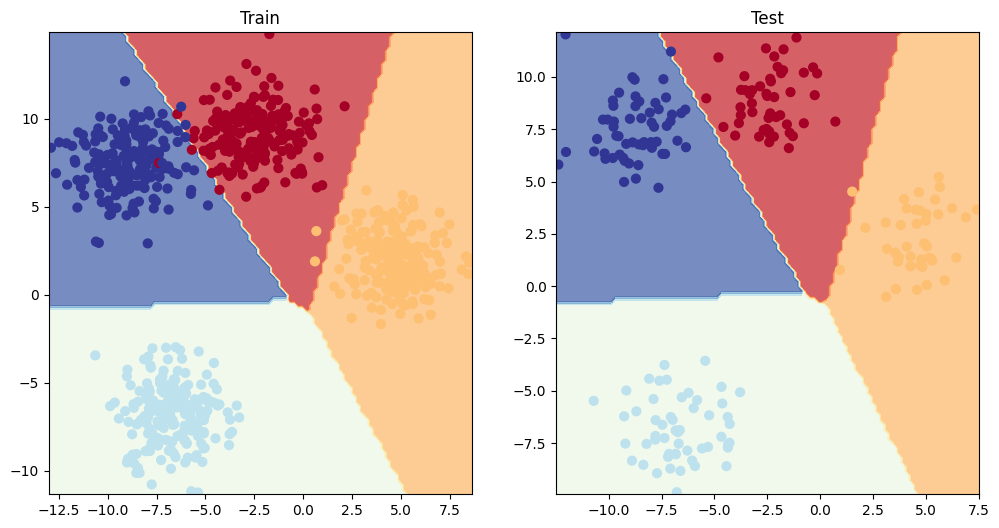

In [122]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_mc, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_mc, X_blob_test, y_blob_test)

In [123]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 13.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [128]:
from torchmetrics import Accuracy

torchmetric_accruacy = Accuracy(task='multiclass', num_classes=NUM_CLASSES).to(device)

torchmetric_accruacy(y_preds, y_blob_test)

tensor(0.9900, device='cuda:0')